<a href="https://colab.research.google.com/github/Alexxakiode/Introduction-to-Machine-Learning/blob/main/Bank_Loan_Approval_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREPARING THE DATA LOADING PROCEDURE

Establishing conditions to ensure clear and smooth code run

In [ ]:
#To esablish a system that shuts up unnecessary warnings
!pip install shutup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing unncessary warning avoidance libraries
import shutup;shutup.please()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#Importing python libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing

LOADING THE DATA

In [ ]:
#To store away the file on a cloud drive such as Google drive
!pip install --upgrade --q --no-cache-dir gdown

In [ ]:
#Storing the dataset exactly in the main folder as this file on cloud drive
!gdown <"bank-full.csv">

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `gdown <"bank-full.csv">'


In [ ]:
#Importing the dataset from the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset for exploration
bank_details = pd.read_csv("/content/drive/MyDrive/ML Assignment/bank-full.csv")

In [ ]:
# Displaying the first 5 lines of the dataset
bank_details.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Displaying the last 5 lines of the dataset
bank_details.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
#Displaying the number of rows and columns in the dataset
bank_details.shape

(45211, 17)

DATA EXPLORATION (EXPLORATORY DATA ANALYSIS (EDA))


Features Description

age           int64 | The age of individuals in years (numeric)

job          object | The kind of employment in which the applicant is at the time of survey - (categorical:admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')

marital      object | This is the marital status of the individual - marital status (categorical:'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

education    object | The level of education of the individuals - education (categorical: tertiary, secondary, primary, and unknown)

default      object | The credit default status of individuals -  has credit in default or not? (categorical: 'no','yes','unknown')

balance       int64 | Their average yearly balance, in euros (numeric)

housing      object | has housing loan? (categorical: 'no','yes','unknown')

loan         object | has personal loan? (categorical: 'no','yes','unknown')

contact      object | Method of contact; email, phone or sms - contact communication type (categorical:'cellular','telephone')

day           int64 | Date of contact during the survey - last contact day of the month (numeric 1 -31)

month        object | Contact month in the year - last contact month of year (categorical: 'jan', 'feb','mar', …, 'nov', 'dec')

duration      int64 | Not sure what this means but it looks like the duration of call during the data collection/campaign procedure - last contact duration, in seconds (numeric) 

This column was dropped because it does not allow for realistic predictive model.

campaign      int64 | Number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays         int64 | Column not clearly defined although it is said that it is the number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

previous      int64 | Number of contacting performed before the present campaign for the client(numeric)

poutcome     object | Outcome of previous campaign (categorical: 'failure','nonexistent','success')

Target description:

Target       object | Customer's loan application is approved or not (binary:"yes","no")

In [ ]:
#Displaying the dataset in an array format
bank_details.values

array([[58, 'management', 'married', ..., 0, 'unknown', 'no'],
       [44, 'technician', 'single', ..., 0, 'unknown', 'no'],
       [33, 'entrepreneur', 'married', ..., 0, 'unknown', 'no'],
       ...,
       [72, 'retired', 'married', ..., 3, 'success', 'yes'],
       [57, 'blue-collar', 'married', ..., 0, 'unknown', 'no'],
       [37, 'entrepreneur', 'married', ..., 11, 'other', 'no']],
      dtype=object)

In [ ]:
# Displaying the columns in the dataset only
bank_details.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [ ]:
#To print information about a DataFrame bank_details
bank_details.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#To see the type of files in each column e.g numeric or categorical
#int64 = Integers(numeric), object = Strings(categorical)
bank_details.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [ ]:
#Displaying the mean of the target grouping 
bank_details.groupby('Target').mean()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [ ]:
#Displaying the median of the target grouping
bank_details.groupby('Target').median()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,39.0,417.0,16.0,164.0,2.0,-1.0,0.0
yes,38.0,733.0,15.0,426.0,2.0,-1.0,0.0


In [ ]:
#Viewing the data in the column called education
bank_details.education

0         tertiary
1        secondary
2        secondary
3          unknown
4          unknown
           ...    
45206     tertiary
45207      primary
45208    secondary
45209    secondary
45210    secondary
Name: education, Length: 45211, dtype: object

CLEANING THE DATA

In [ ]:
#Checking for duplicated values
bank_details.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [ ]:
#Checking for the total sum of the duplicates if any
bank_details.duplicated().sum()

0

In [ ]:
#Dropping all the duplicates within the dataset
bank_details.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
#Querying the unknown in the education column
#I have dropped other columns that contains 'unknown' since they are not useful for the model
bank_details = bank_details.query('education != "unknown"')
bank_details

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
#Viewing the unique elements in marital status for instance
bank_details["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
#Printing the job types for note
bank_details.job

0          management
1          technician
2        entrepreneur
5          management
6          management
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 43354, dtype: object

DATA SORTING ANALYSIS

In [ ]:
#Sorting the dataset according to loan status
bank_details.sort_values(by=['loan'],ascending=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
12648,45,blue-collar,divorced,primary,no,8,no,yes,unknown,4,jul,407,1,-1,0,unknown,no
18264,56,management,married,secondary,no,208,no,yes,telephone,31,jul,84,6,-1,0,unknown,no
18278,46,admin.,married,secondary,no,526,no,yes,cellular,31,jul,251,3,-1,0,unknown,no
18276,38,technician,married,secondary,yes,0,no,yes,cellular,31,jul,44,28,-1,0,unknown,no
30885,41,entrepreneur,married,tertiary,no,367,no,yes,cellular,9,feb,13,5,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17131,35,technician,married,tertiary,no,1629,no,no,cellular,25,jul,653,4,-1,0,unknown,yes
17132,38,blue-collar,married,primary,no,406,yes,no,cellular,25,jul,460,5,-1,0,unknown,no
17133,41,blue-collar,married,secondary,no,1915,yes,no,cellular,25,jul,245,4,-1,0,unknown,no
17134,27,technician,single,secondary,no,-646,yes,no,cellular,25,jul,135,8,-1,0,unknown,no


In [ ]:
#Sorting the dataset according to account balance
bank_details.sort_values(by=["balance"],ascending=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
41693,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
7413,43,management,married,tertiary,yes,-3372,yes,no,unknown,29,may,386,2,-1,0,unknown,no
38736,60,management,divorced,tertiary,no,-4057,yes,no,cellular,18,may,242,6,-1,0,unknown,no
15682,49,management,married,tertiary,yes,-6847,no,yes,cellular,21,jul,206,1,-1,0,unknown,no


In [ ]:
#Sorting the dataset according to duration of call
bank_details.sort_values(by=['duration'],ascending=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24148,59,technician,married,tertiary,no,6573,yes,no,telephone,10,nov,4918,1,-1,0,unknown,no
9947,59,management,married,secondary,no,1321,no,no,unknown,9,jun,3881,3,-1,0,unknown,yes
44602,45,services,single,secondary,no,955,no,no,unknown,27,aug,3785,1,-1,0,unknown,no
19639,37,blue-collar,married,tertiary,no,359,no,yes,cellular,7,aug,3422,2,-1,0,unknown,no
2386,45,blue-collar,married,secondary,no,66,yes,no,unknown,13,may,3366,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44758,28,admin.,married,secondary,no,1595,no,no,unknown,9,sep,1,1,254,4,success,no
31740,39,technician,divorced,secondary,no,17441,yes,yes,cellular,7,apr,1,1,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no


In [ ]:
#Sorting the dataset according to age of applicants
bank_details.sort_values(by=['age'],ascending=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
33699,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,yes
41663,95,retired,married,secondary,no,0,no,no,telephone,1,oct,215,1,-1,0,unknown,no
31233,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,no
31069,90,retired,divorced,secondary,no,1,no,no,cellular,13,feb,152,3,-1,0,unknown,yes
43194,90,retired,divorced,primary,no,712,no,no,telephone,3,mar,557,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42146,18,student,single,secondary,no,156,no,no,cellular,4,nov,298,2,82,4,other,no
41252,18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no
42274,18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes
40736,18,student,single,primary,no,1944,no,no,telephone,10,aug,122,3,-1,0,unknown,no


DATA STATISTICAL ANALYSIS

In [ ]:
# Checking the description of the dataset
bank_details.describe()

,age,balance,day,duration,campaign,pdays,previous
count,43354.000000,43354.000000,43354.000000,43354.000000,43354.000000,43354.000000,43354.000000
mean,40.783111,1355.226715,15.806223,258.199451,2.760184,40.340960,0.584260
std,10.518987,3039.916830,8.306493,258.028124,3.065496,100.331955,2.329661
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,443.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1415.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,58.000000,871.000000,275.000000


In [ ]:
from statistics import median
bank_details.median

<bound method NDFrame._add_numeric_operations.<locals>.median of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
5       35    management   married   tertiary      no      231     yes   no   
6       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971    

DATA FEATURE SELECTION/QUERYING

In [ ]:
for item in bank_details.columns:
    print('Unique in Column:  ', item)
    display(pd.unique(bank_details[item]))
    print()


Unique in Column:   age


array([58, 44, 33, 35, 28, 42, 43, 41, 29, 53, 57, 51, 60, 56, 32, 25, 40,
       39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 45, 47, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 19, 77, 86,
       95, 81, 18, 89, 84, 87, 88])


Unique in Column:   job


array(['management', 'technician', 'entrepreneur', 'retired', 'admin.',
       'services', 'blue-collar', 'self-employed', 'unemployed',
       'housemaid', 'student', 'unknown'], dtype=object)


Unique in Column:   marital


array(['married', 'single', 'divorced'], dtype=object)


Unique in Column:   education


array(['tertiary', 'secondary', 'primary'], dtype=object)


Unique in Column:   default


array(['no', 'yes'], dtype=object)


Unique in Column:   balance


array([ 2143,    29,     2, ...,  8205, 14204, 16353])


Unique in Column:   housing


array(['yes', 'no'], dtype=object)


Unique in Column:   loan


array(['no', 'yes'], dtype=object)


Unique in Column:   contact


array(['unknown', 'cellular', 'telephone'], dtype=object)


Unique in Column:   day


array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])


Unique in Column:   month


array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)


Unique in Column:   duration


array([ 261,  151,   76, ..., 1298, 1246, 1556])


Unique in Column:   campaign


array([ 1,  2,  3,  5,  4,  7,  8,  6,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 41, 26, 28, 55, 50, 38, 23, 20,
       29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])


Unique in Column:   pdays


array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 244, 239, 245, 204, 231, 238,
       258, 230, 265,  71, 223, 246, 250, 266, 205, 240, 261, 259, 241,
       260, 234, 226, 251, 225, 161, 237, 262, 248, 254, 255, 220, 227,
       224, 206, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22


Unique in Column:   previous


array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])


Unique in Column:   poutcome


array(['unknown', 'failure', 'other', 'success'], dtype=object)


Unique in Column:   Target


array(['no', 'yes'], dtype=object)

In [ ]:
bank_details.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
bank_details

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


EXPLORATORY DATA ANALYSIS (EDA)

Unwanted columns?

In [ ]:
#Removing unwanted columns
bank_details = bank_details.drop(["contact", "campaign","poutcome", "pdays", "previous", "day"], axis=1)


In [ ]:
#Displaying the remaining datatset
bank_details

,age,job,marital,education,default,balance,housing,loan,month,duration,Target
0,58,management,married,tertiary,no,2143,yes,no,may,261,no
1,44,technician,single,secondary,no,29,yes,no,may,151,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,may,76,no
5,35,management,married,tertiary,no,231,yes,no,may,139,no
6,28,management,single,tertiary,no,447,yes,yes,may,217,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,nov,977,yes
45207,71,retired,divorced,primary,no,1729,no,no,nov,456,yes
45208,72,retired,married,secondary,no,5715,no,no,nov,1127,yes
45209,57,blue-collar,married,secondary,no,668,no,no,nov,508,no


In [ ]:
#Finding a feature with missing values A
features_na = [features for features in bank_details.columns if bank_details[features].isnull().sum() > 0]
for feature in features_na:
  print(feature, np.round(bank_details[features].isnull().mean(), 4), ' % missing values')
else:
  print('No missing value found')

No missing value found


In [ ]:
#Checking for empty values in the dataset
bank_details.isnull()

,age,job,marital,education,default,balance,housing,loan,month,duration,Target
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Finding a feature with missing values
bank_details.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
month        0
duration     0
Target       0
dtype: int64

In [ ]:
#Printing the features unique values to understand what it contains
bank_details.nunique()

age            75
job            12
marital         3
education       3
default         2
balance      7009
housing         2
loan            2
month          12
duration     1559
Target          2
dtype: int64

In [ ]:
#Checking the categorical features
cat_features=[feature for feature in bank_details.columns if ((bank_details[feature].dtypes=='0'), (feature not in ['Target']))]
cat_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'month',
 'duration',
 'Target']

In [ ]:
#Importing more libraries for plottings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Printing the number of yes and no in the target column
bank_details.Target.value_counts()

no     38317
yes     5037
Name: Target, dtype: int64

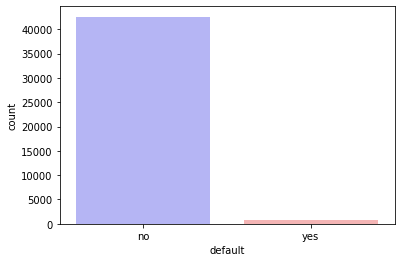

In [ ]:
#Plotting the count against default features
from seaborn.widgets import color_palette
sns.countplot(x="default", data=bank_details, palette='bwr')
plt.show()

In [ ]:
#Printing the number of yes and no in the loan column
bank_details.loan.value_counts()

no     36243
yes     7111
Name: loan, dtype: int64

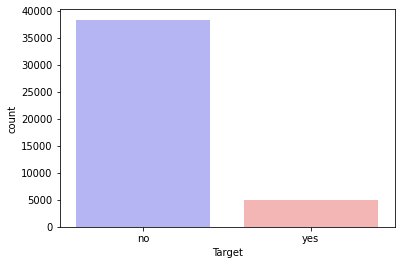

In [ ]:
#Plotting the count against target label
sns.countplot(x="Target", data=bank_details , palette="bwr")
plt.show()

In [ ]:
#Importing libraries for Label Encoding

import sklearn
import sklearn_pandas
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [ ]:
#Converting categorical features to numerical features for regression
bank_details['default'] = bank_details['default'].map({'no':0, 'yes':1})
bank_details['housing'] = bank_details['housing'].map({'no':0, 'yes':1})
bank_details['loan'] = bank_details['loan'].map({'no':0, 'yes':1})
bank_details['Target'] = bank_details['Target'].map({'no':0, 'yes':1})


In [ ]:
#Converting months from string to integer
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

bank_details['month'] = Le.fit_transform(bank_details['month'])

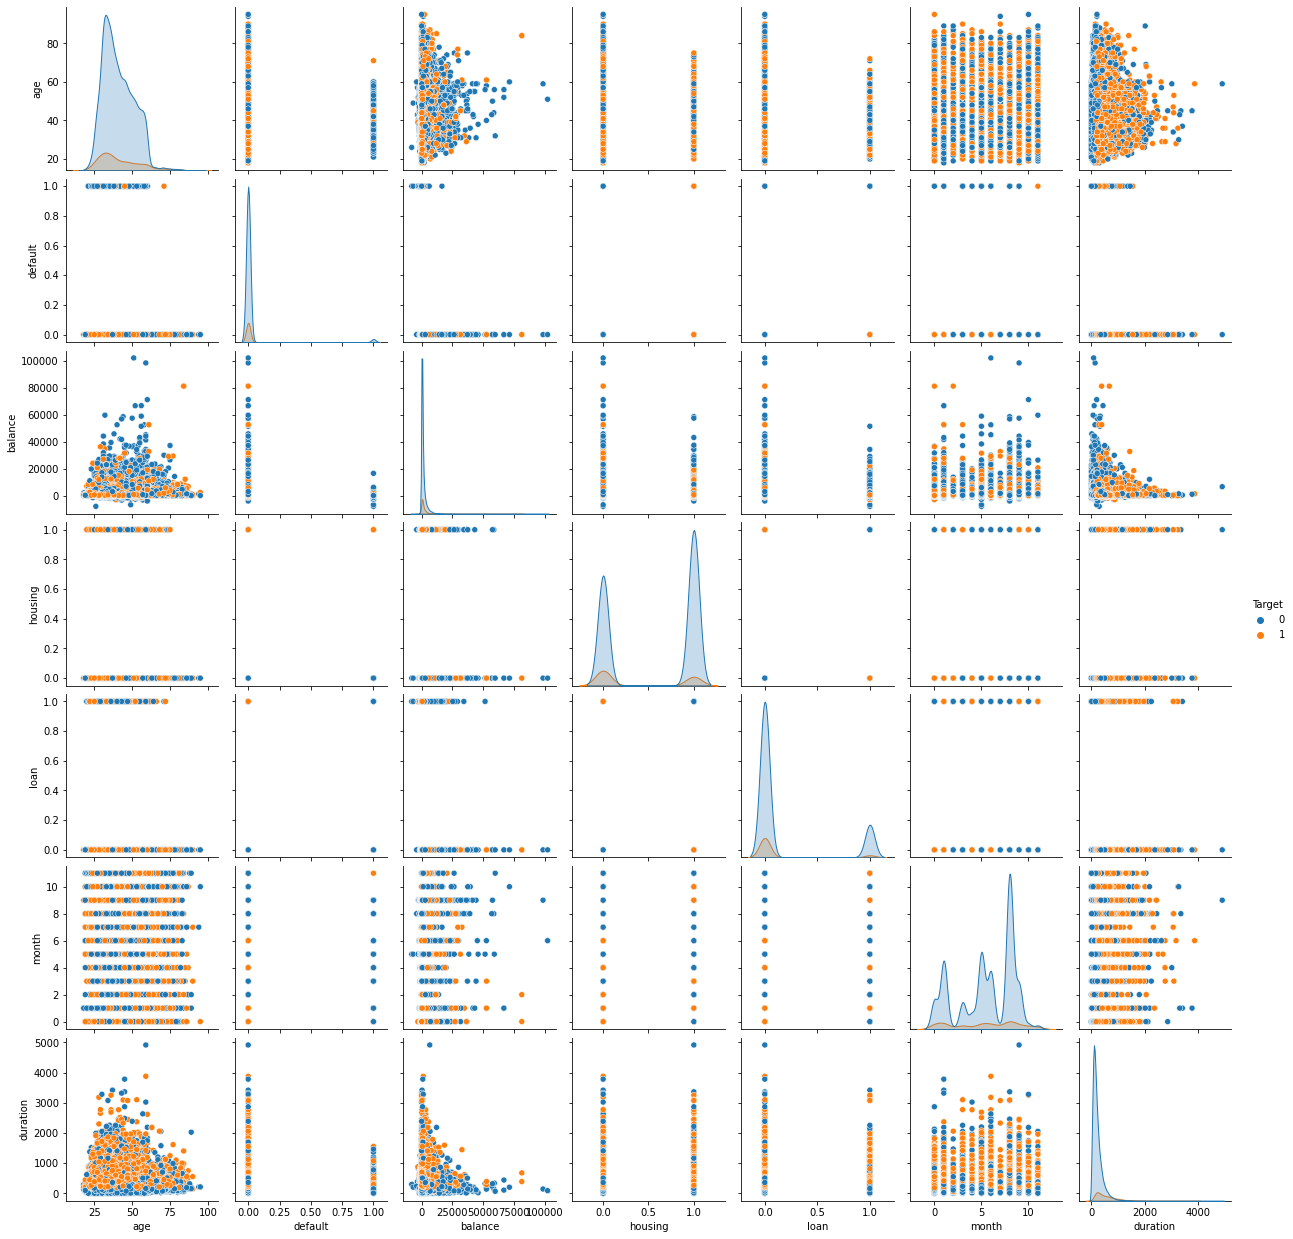

In [ ]:
sns.pairplot(bank_details,hue='Target')

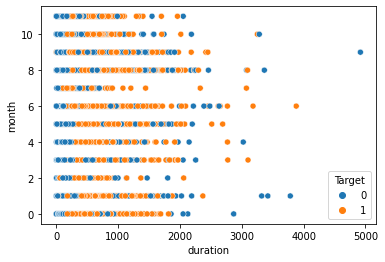

In [ ]:
sns.scatterplot(x='duration',y='month',data=bank_details,hue='Target')

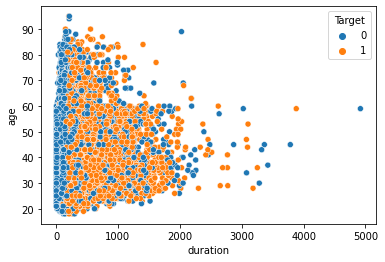

In [ ]:
sns.scatterplot(x='duration',y='age',data=bank_details,hue='Target')

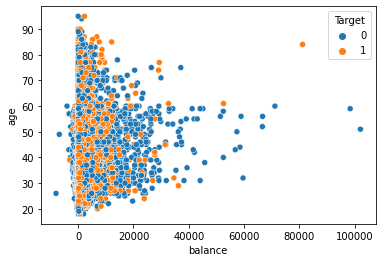

In [ ]:
sns.scatterplot(x='balance',y='age',data=bank_details,hue='Target')

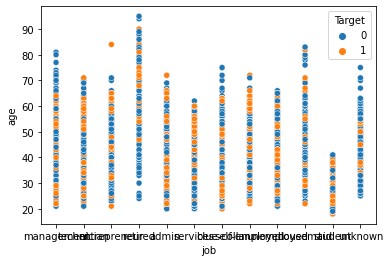

In [ ]:
sns.scatterplot(x='job',y='age',data=bank_details,hue='Target')

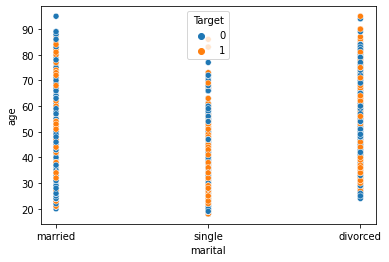

In [ ]:
sns.scatterplot(x='marital',y='age',data=bank_details,hue='Target')

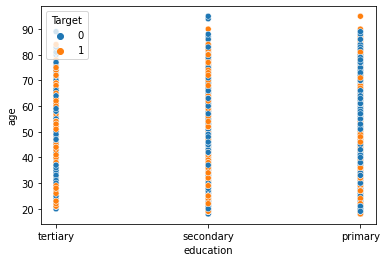

In [ ]:
sns.scatterplot(x='education',y='age',data=bank_details,hue='Target')

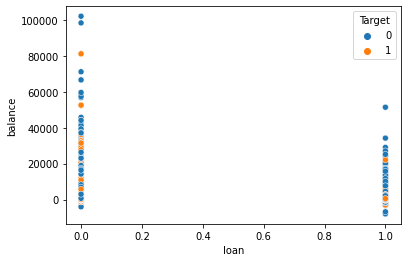

In [ ]:
sns.scatterplot(x='loan',y='balance',data=bank_details,hue='Target')

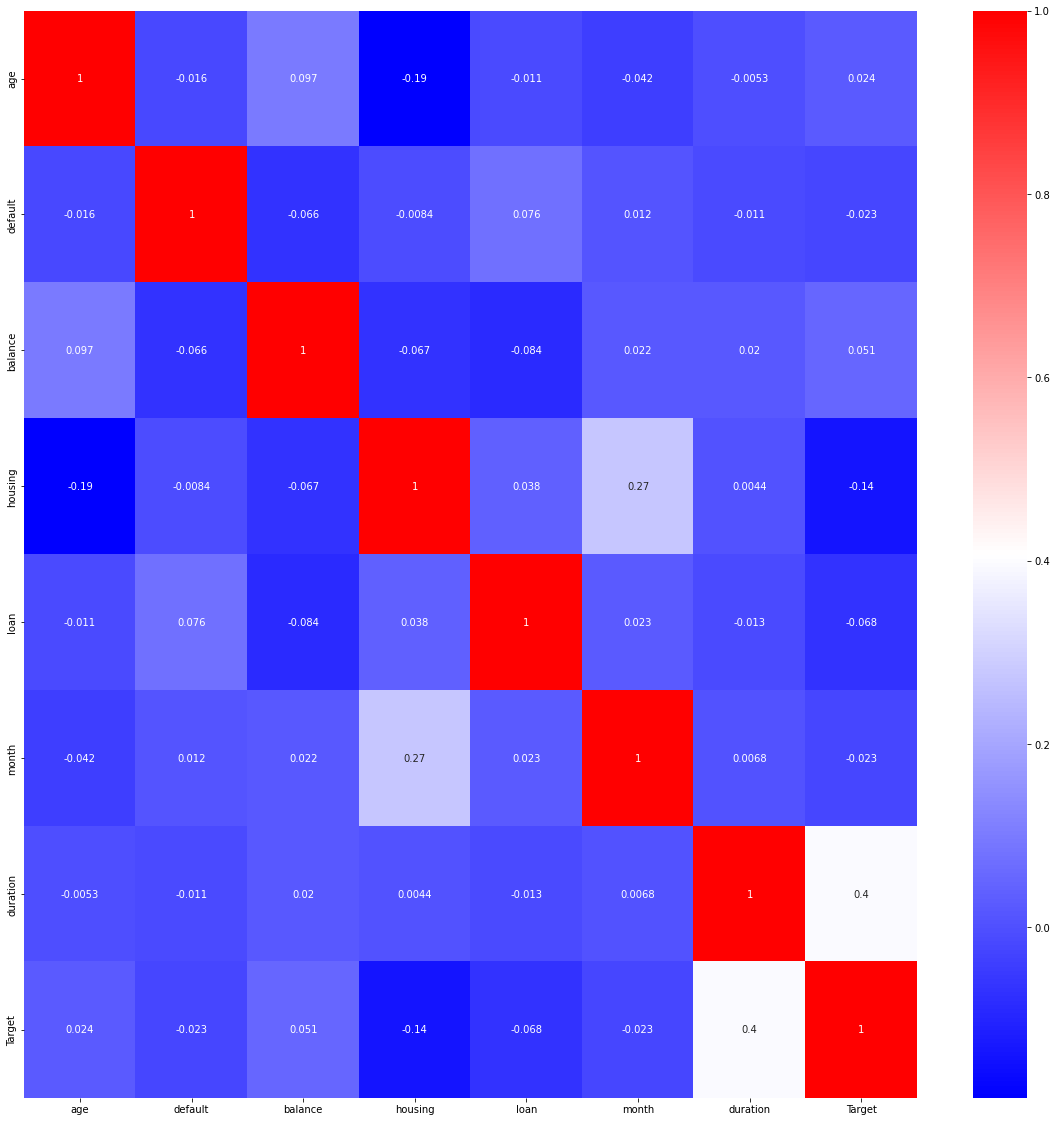

In [ ]:
corrmat = bank_details.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(bank_details[top_corr_features].corr(),annot=True,cmap="bwr")


In [ ]:
! pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 66.9 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report ./Loan_Approval_Status_EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



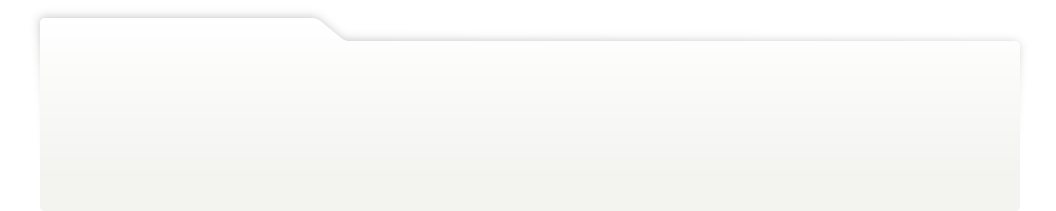
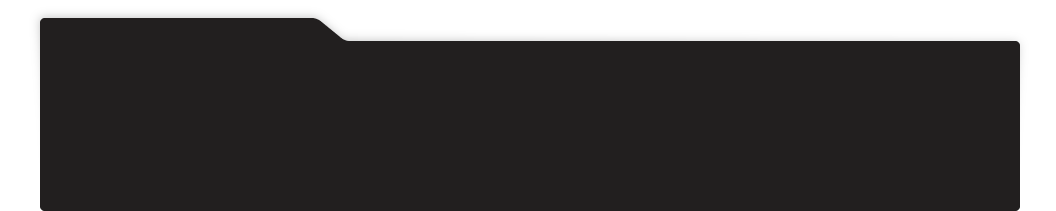
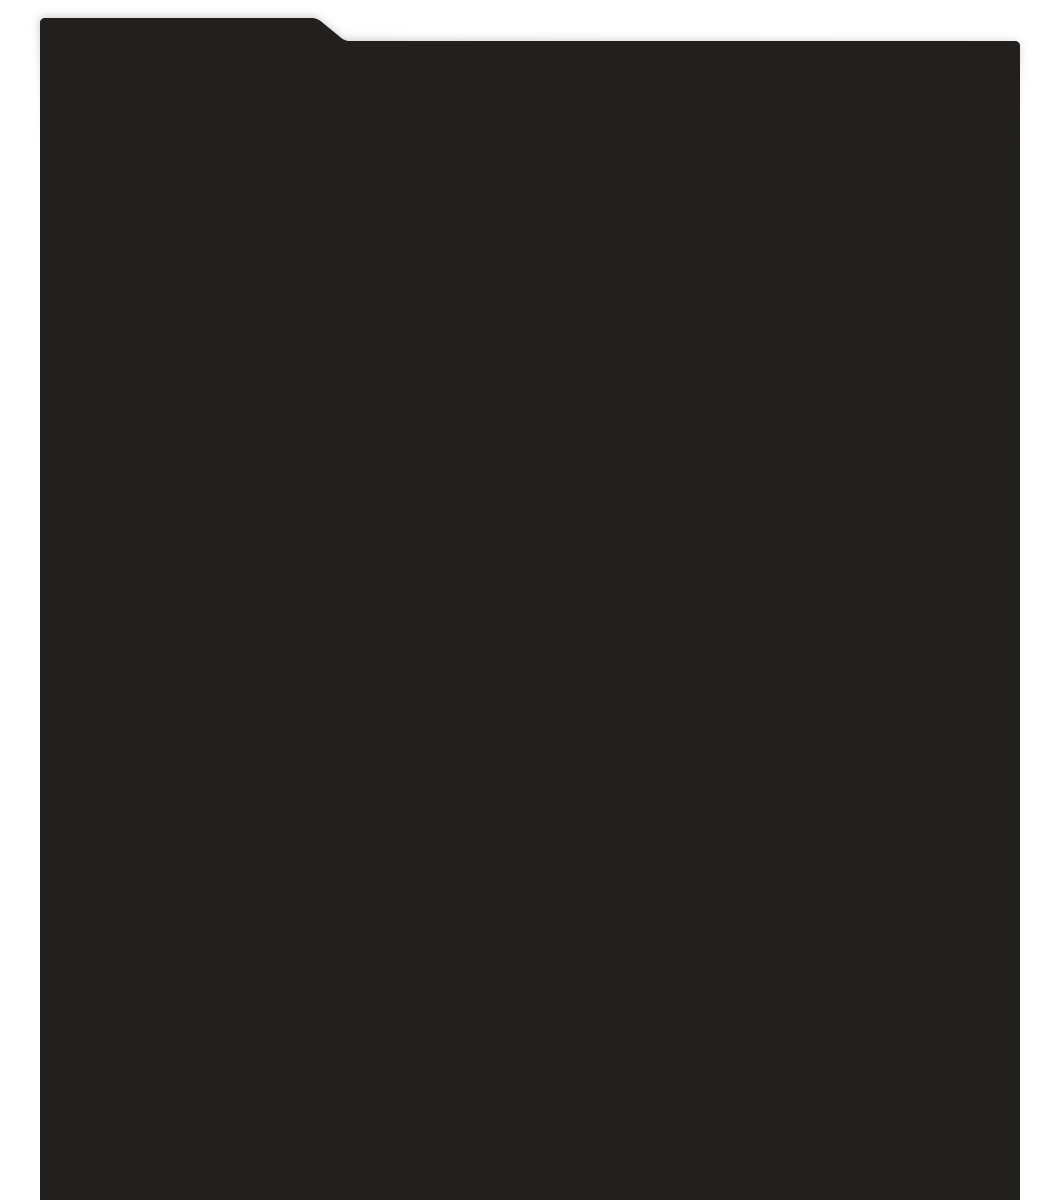
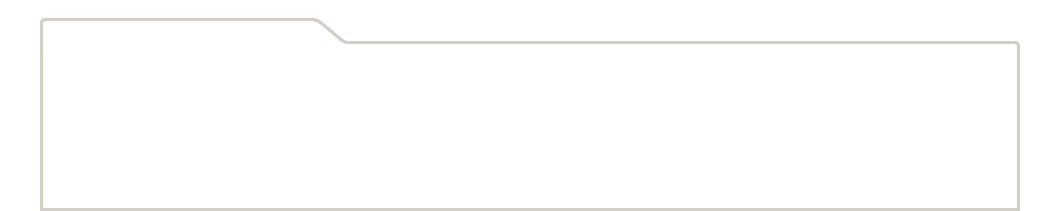
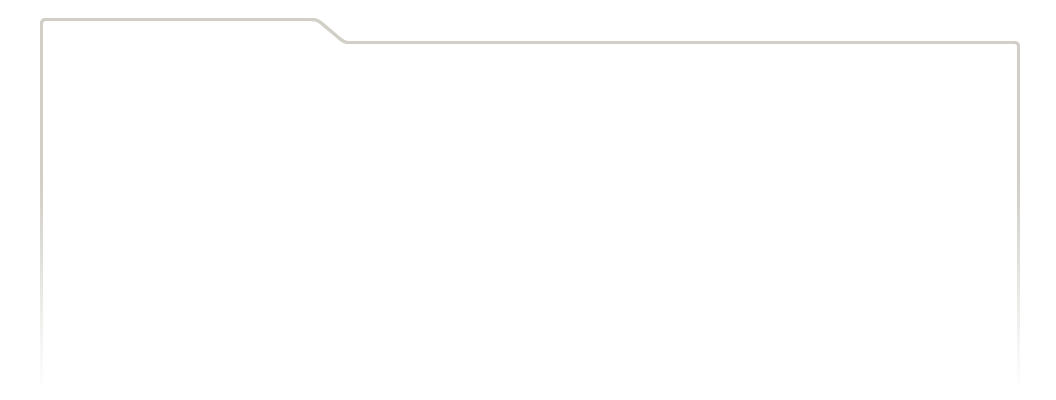
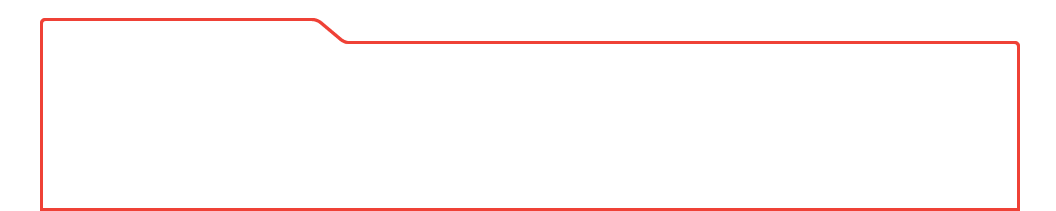
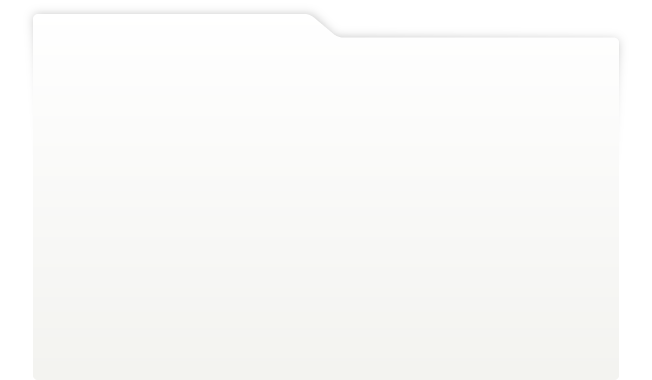
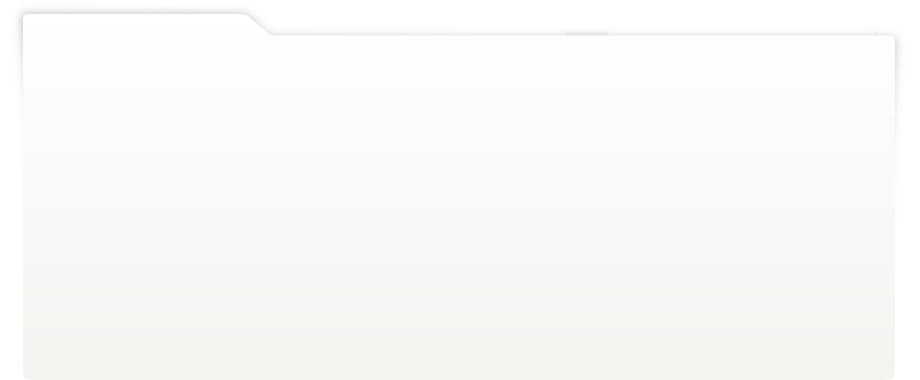
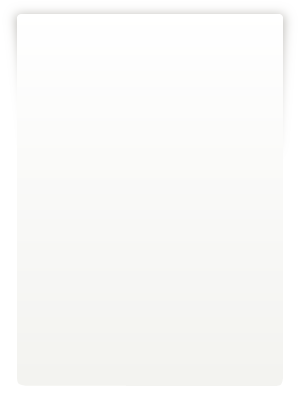
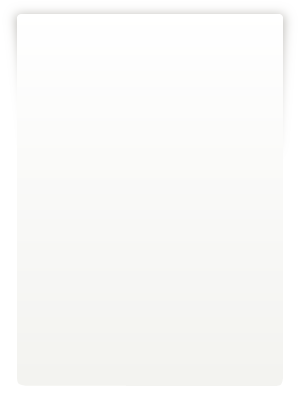
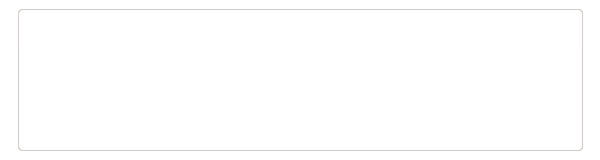
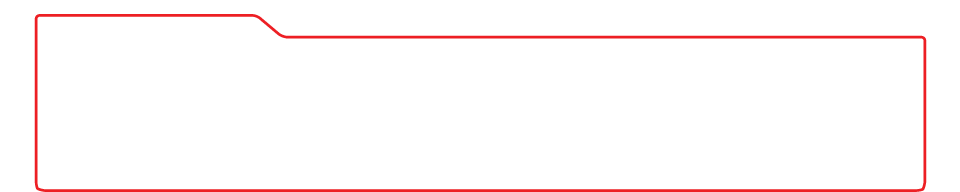
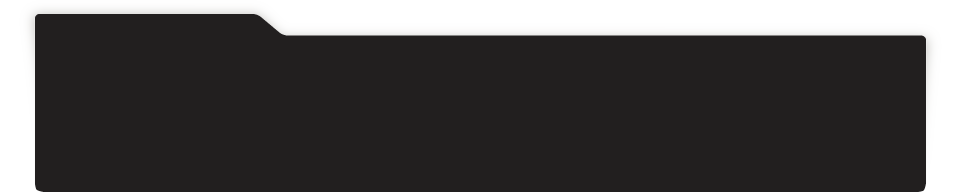
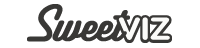
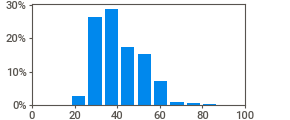
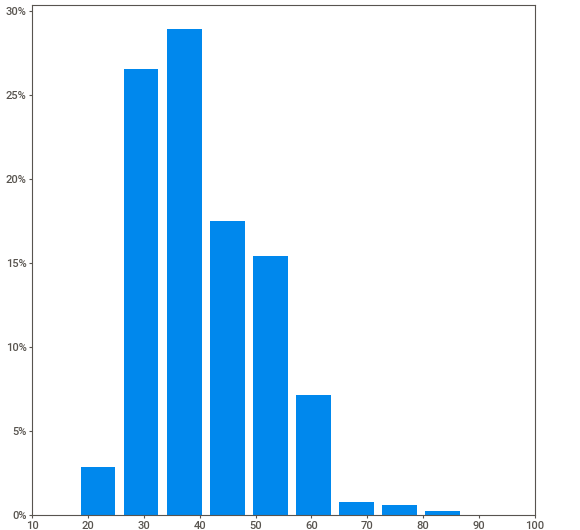
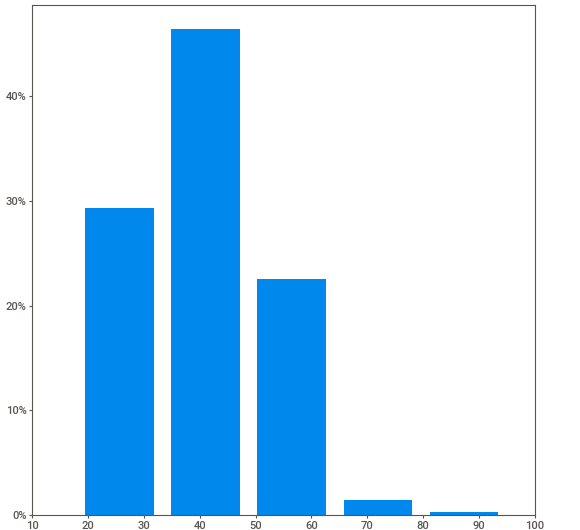
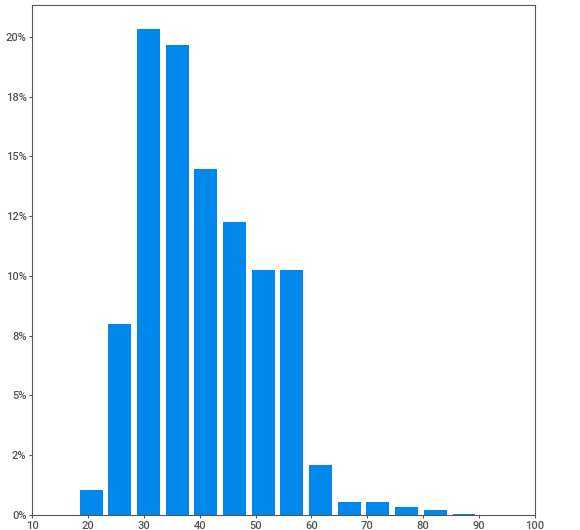
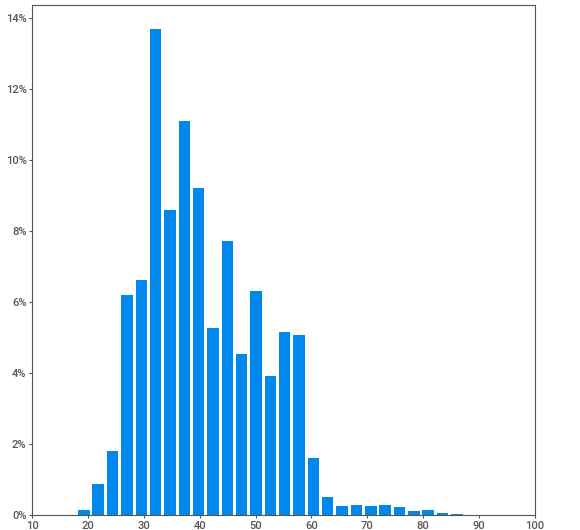
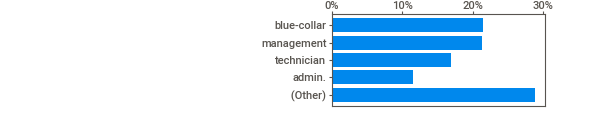
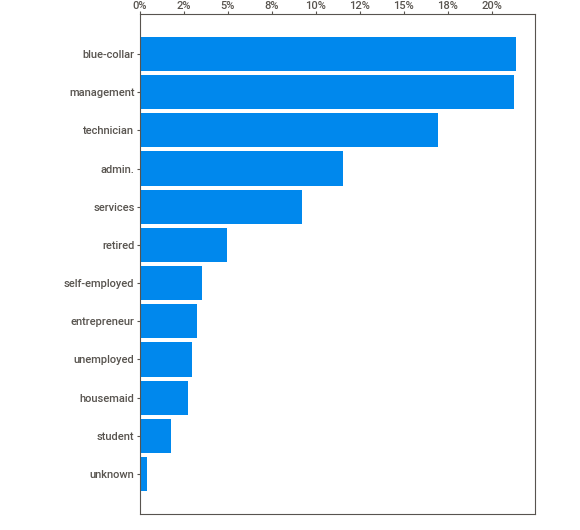
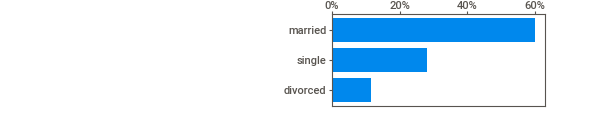
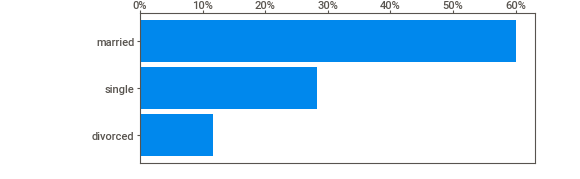
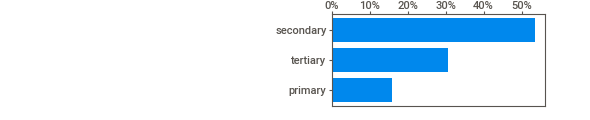
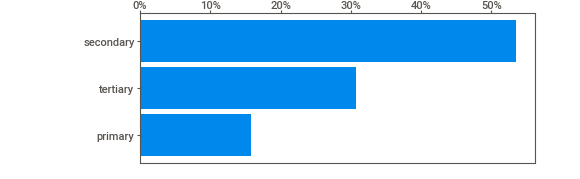
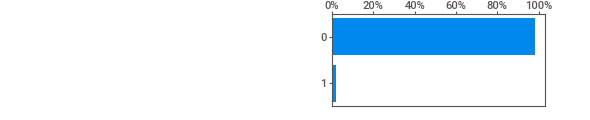
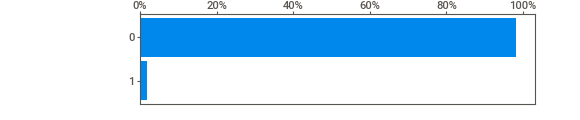
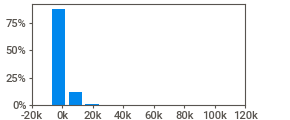
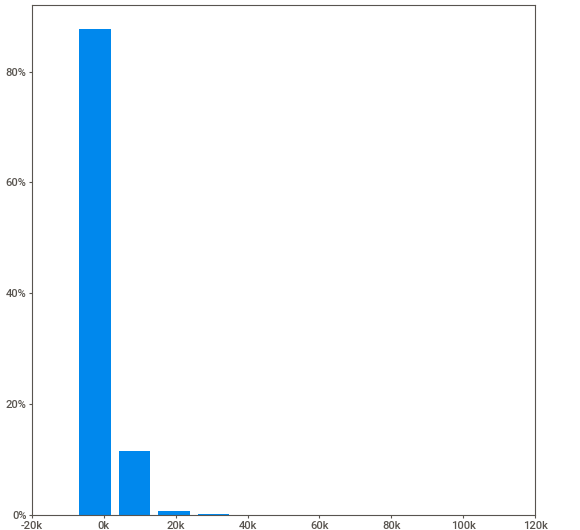
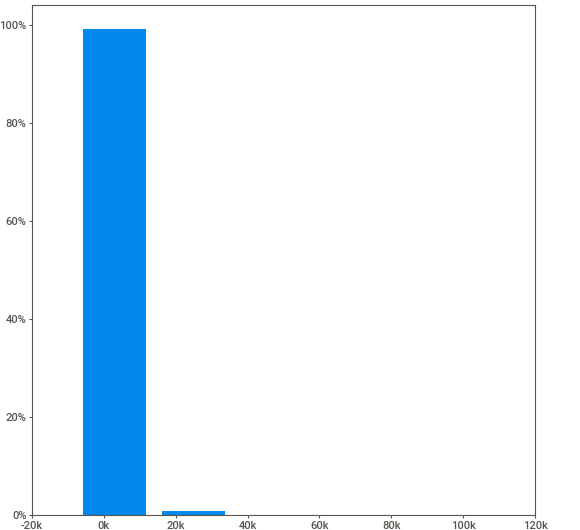
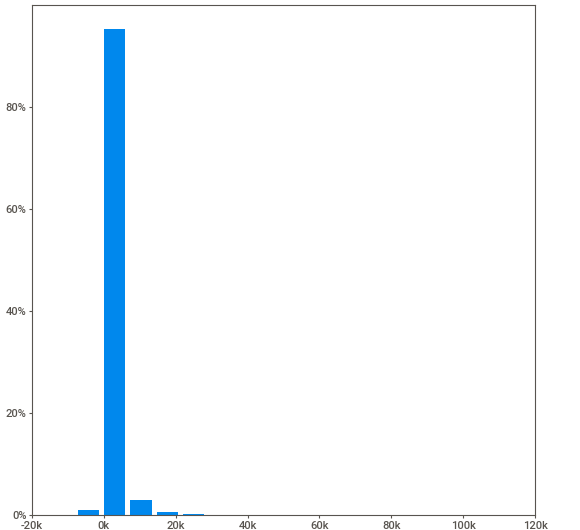
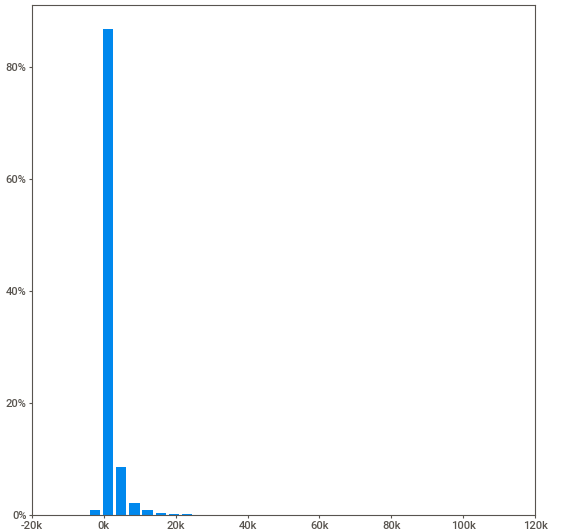
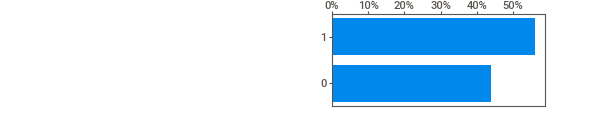
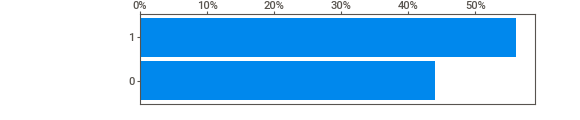
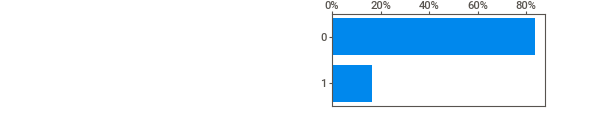
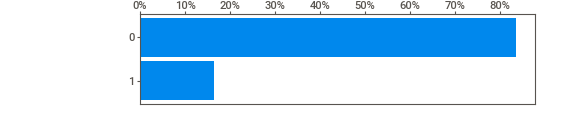
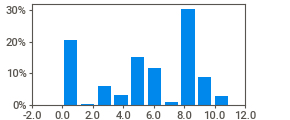
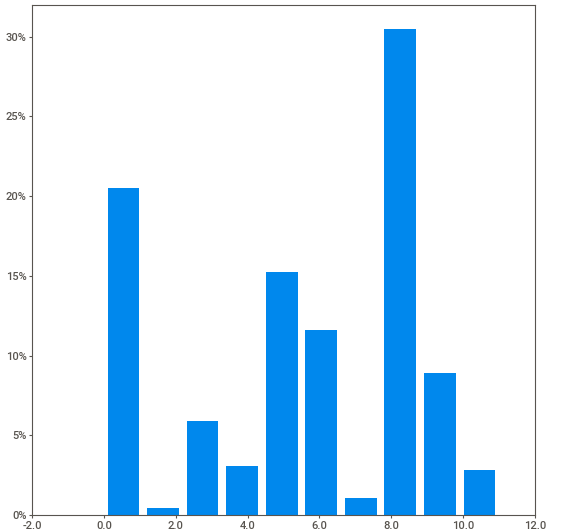
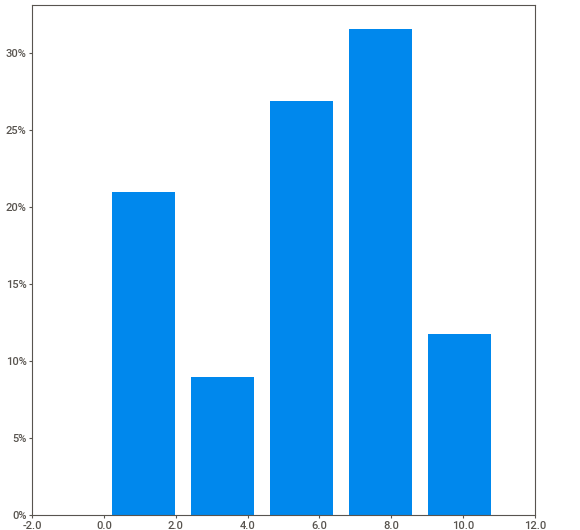
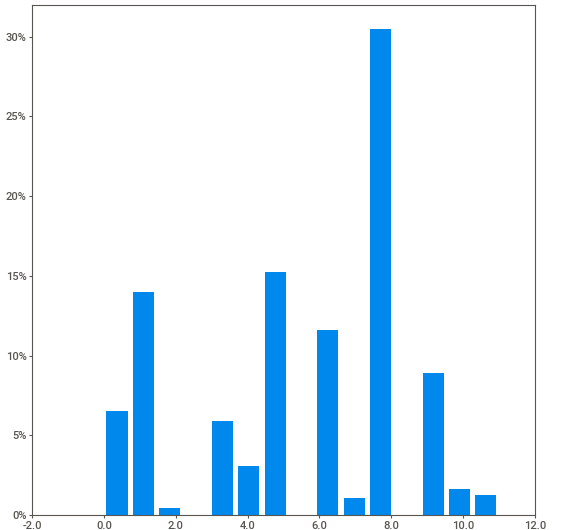
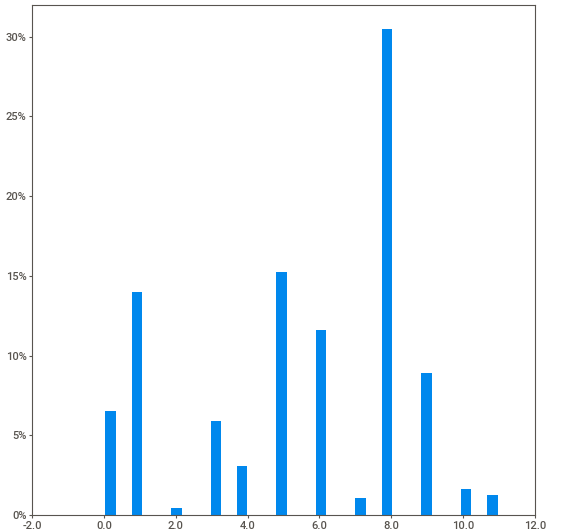
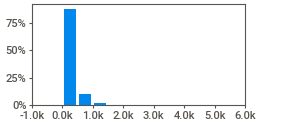
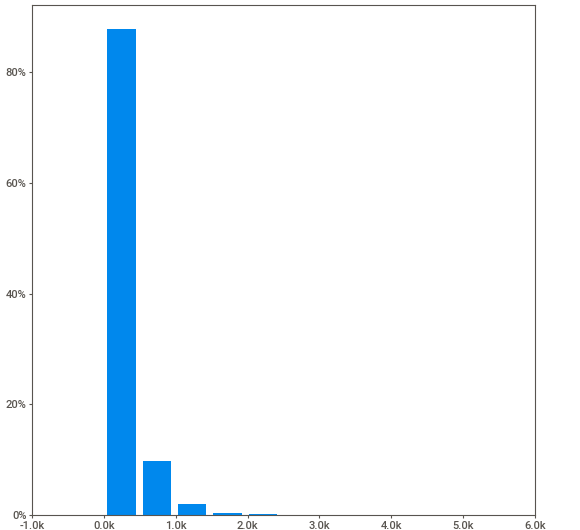
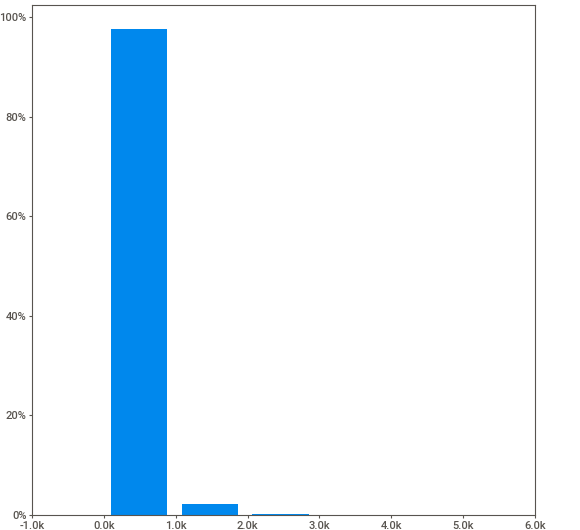
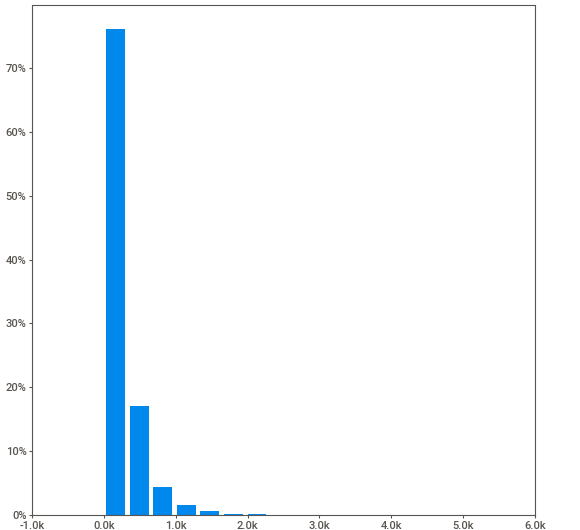
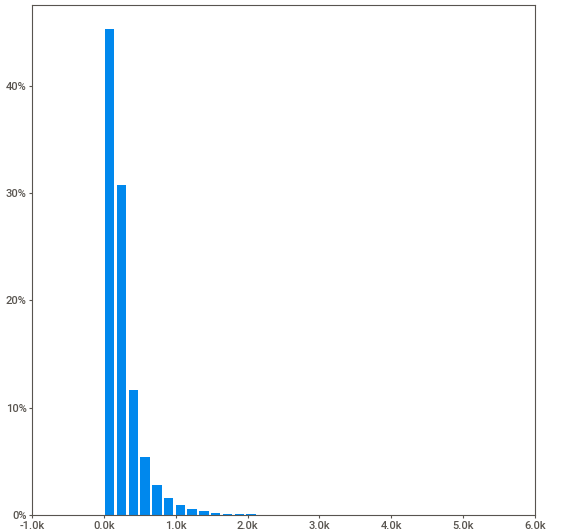
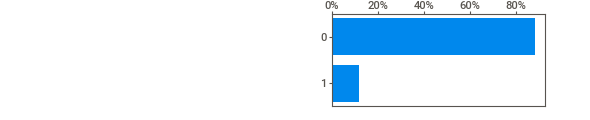
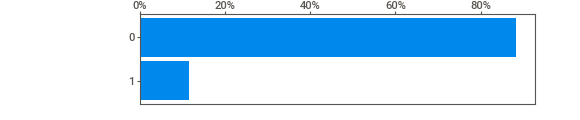
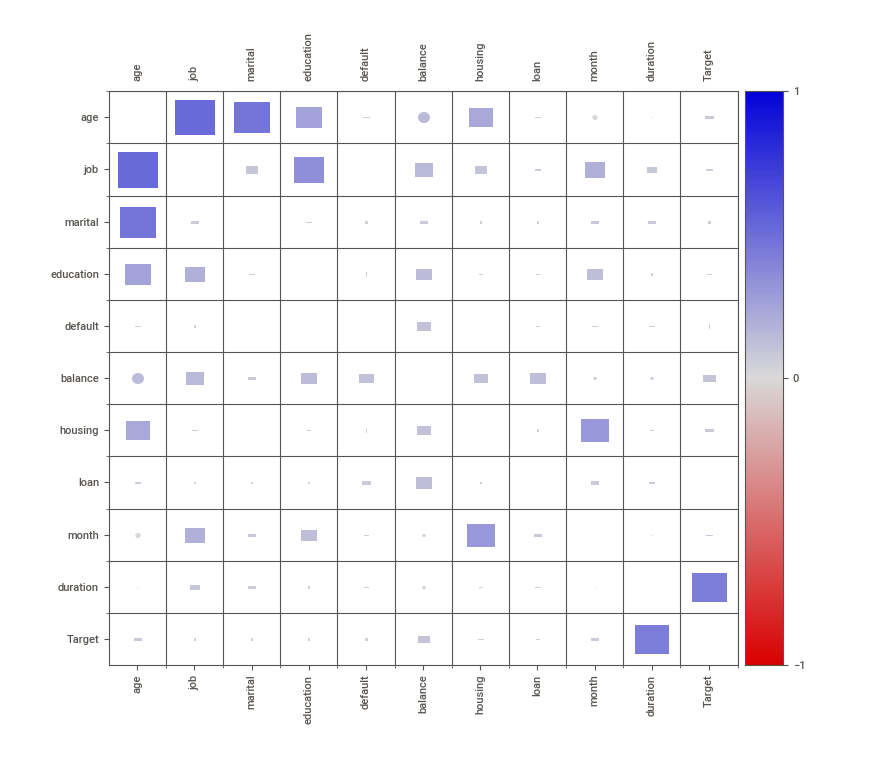
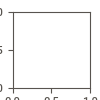

Report './Loan_Approval_Status_EDA' was saved to storage.


In [ ]:
import sweetviz as sv

#Defining the analysis file
Loan_Approval_Status_EDA = sv.analyze(bank_details)

Loan_Approval_Status_EDA.show_html("./Loan_Approval_Status_EDA.html")

Loan_Approval_Status_EDA.show_notebook(None, None, None, 'widescreen', './Loan_Approval_Status_EDA')

<Figure size 2500x3000 with 0 Axes>

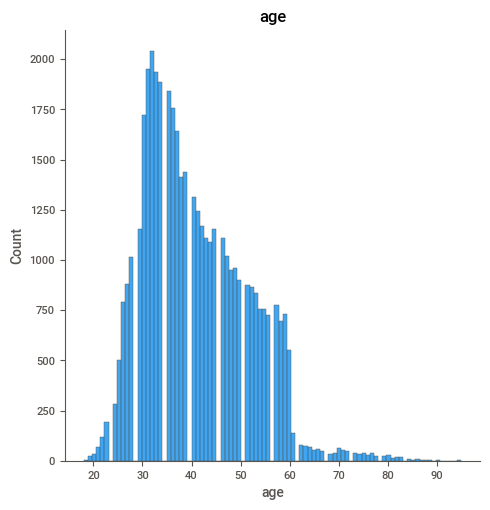

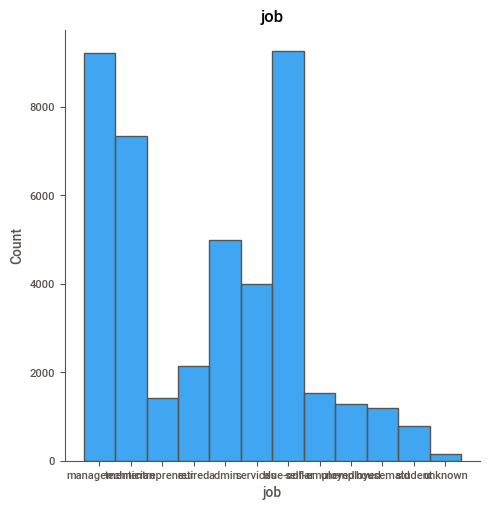

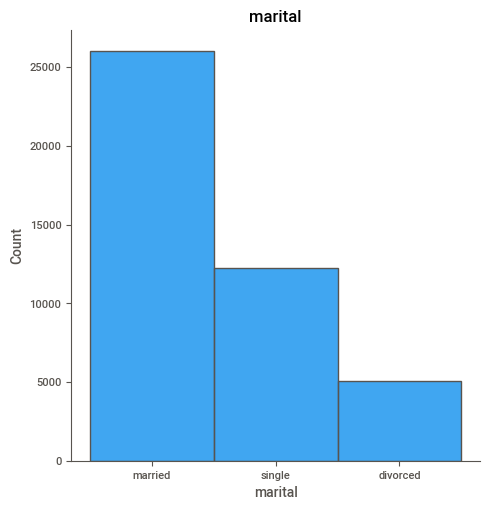

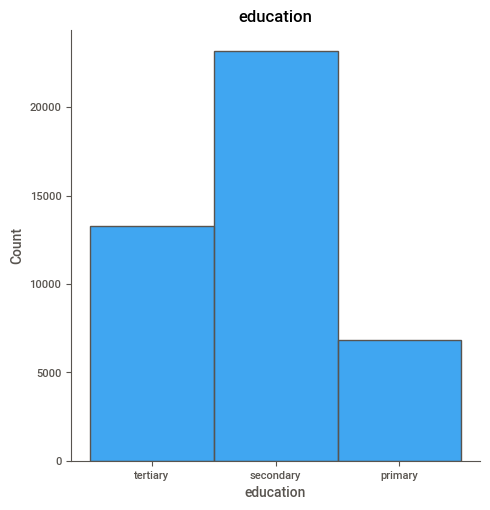

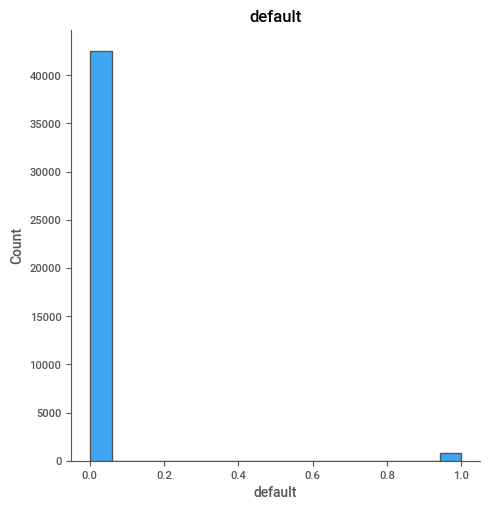

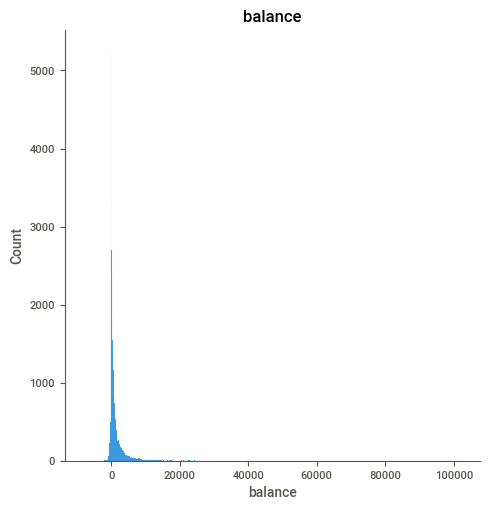

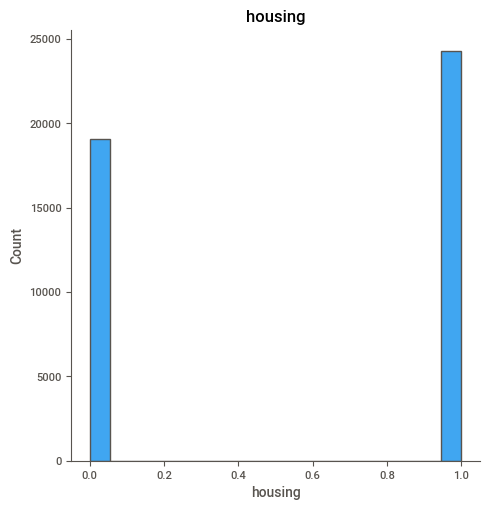

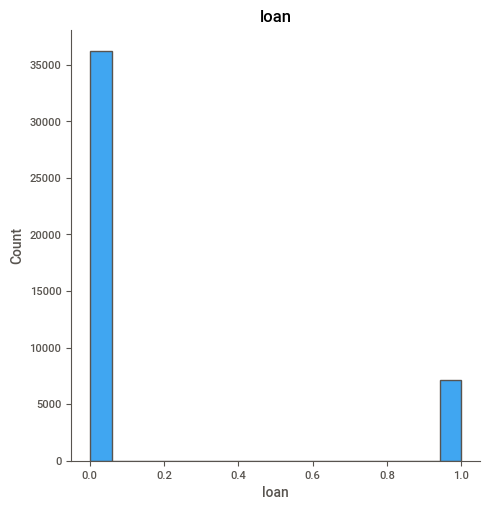

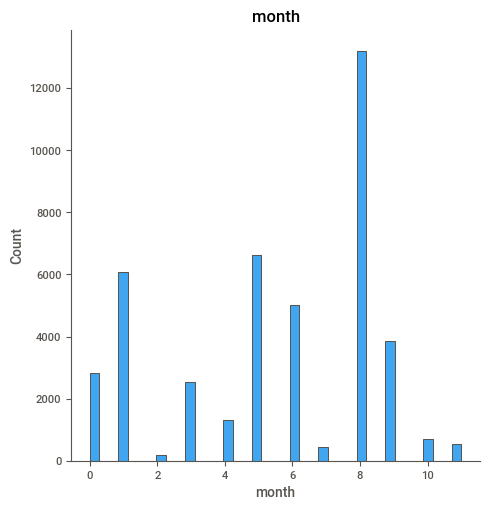

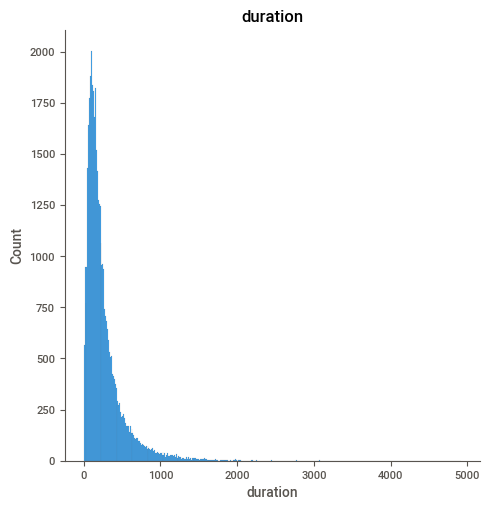

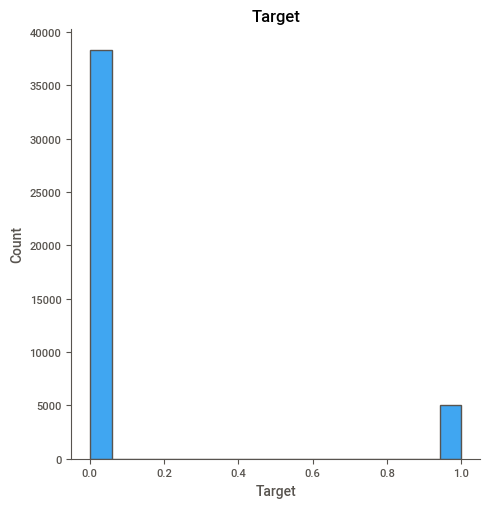

In [ ]:
#Doing univariate analysis
plt.figure(figsize=(25,30))

for features in bank_details: 
  #plt.subplot(5,4,features)
  sns.displot(bank_details[features])
  plt.title(features)
  
  plt.show()

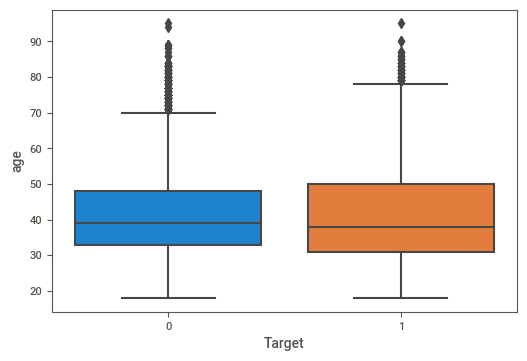

In [ ]:
plt.figure(dpi=100)
sns.boxplot(x='Target',y='age', data=bank_details)

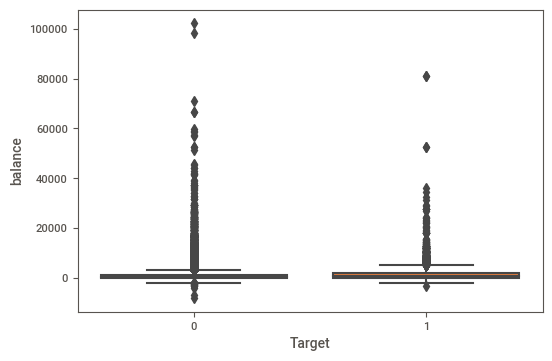

In [ ]:
plt.figure(dpi=100)
sns.boxplot(x='Target', y='balance', data=bank_details)

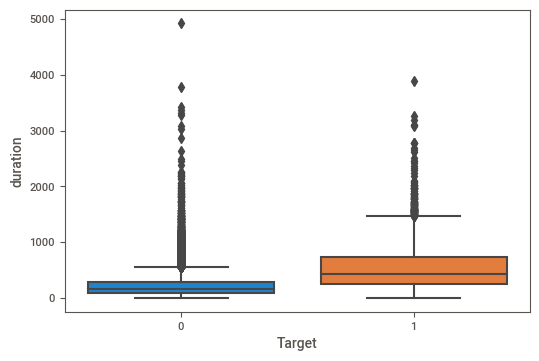

In [ ]:
plt.figure(dpi=100)
sns.boxplot(x='Target',y='duration', data=bank_details)